# AI-Driven Quality Assurance for Fintech Applications: Leveraging LLMs and Agentic AI for Scalable Software Testing

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import torch
from tqdm import tqdm
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from transformers import AutoTokenizer
from transformers import AutoTokenizer, AutoModel
import warnings
warnings.filterwarnings('ignore')

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read and Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Python\Mahesh Reddy (FinTech)\mozilla_bug_report_data.csv")

In [3]:
df

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6
3,RELEASE_ENGINEERING-525991,2009-11-02,General,RELEASE_ENGINEERING,Create Major Update from 3.0.15 to 3.5.5,NaN,catlee,catlee,fixed,1,resolved,4,2013-08-12,0,7,2009-11-10,8,normal,2
4,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,WWW.MOZILLA.ORG-485595,2009-03-27,General,WWW.MOZILLA.ORG,Firefox 2.0. - 2.0.0.20 update/what's new page...,User-Agent: Mozilla/5.0 (Windows U Windo...,nobody,domthedude001,fixed,1,resolved,4,2012-08-23,0,15,2010-12-27,640,trivial,1
9995,CORE-132278,2002-03-20,XPCOM,CORE,|nsCOMPtr::operator&()| has outlived its usefu...,We originally made |operator&| illegal to ease...,scc,scc,fixed,1,resolved,4,2003-01-16,0,10,2002-03-28,8,normal,2
9996,FIREFOX_BUILD_SYSTEM-389793,2007-07-26,General,FIREFOX_BUILD_SYSTEM,Firefox build failed on OpenSolaris without --...,gmake[6]: Entering directory `/export/home/mrb...,ginnchen+exoracle,ginnchen+exoracle,fixed,1,resolved,4,2018-03-02,0,15,2007-08-05,10,normal,2
9997,MOZILLA_LOCALIZATIONS-402568,2007-11-05,fy-NL / Frisian,MOZILLA_LOCALIZATIONS,language pack fails to install due to broken i...,The files \n l10n/fy-NL/browser/defines.inc\n...,fryskefirefox,nthomas,fixed,1,resolved,4,2009-11-27,0,3,2009-11-27,753,normal,2


# Preprocessing

In [4]:
df.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6
3,RELEASE_ENGINEERING-525991,2009-11-02,General,RELEASE_ENGINEERING,Create Major Update from 3.0.15 to 3.5.5,NaN,catlee,catlee,fixed,1,resolved,4,2013-08-12,0,7,2009-11-10,8,normal,2
4,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2


In [5]:
df.tail()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code
9994,WWW.MOZILLA.ORG-485595,2009-03-27,General,WWW.MOZILLA.ORG,Firefox 2.0. - 2.0.0.20 update/what's new page...,User-Agent: Mozilla/5.0 (Windows U Windo...,nobody,domthedude001,fixed,1,resolved,4,2012-08-23,0,15,2010-12-27,640,trivial,1
9995,CORE-132278,2002-03-20,XPCOM,CORE,|nsCOMPtr::operator&()| has outlived its usefu...,We originally made |operator&| illegal to ease...,scc,scc,fixed,1,resolved,4,2003-01-16,0,10,2002-03-28,8,normal,2
9996,FIREFOX_BUILD_SYSTEM-389793,2007-07-26,General,FIREFOX_BUILD_SYSTEM,Firefox build failed on OpenSolaris without --...,gmake[6]: Entering directory `/export/home/mrb...,ginnchen+exoracle,ginnchen+exoracle,fixed,1,resolved,4,2018-03-02,0,15,2007-08-05,10,normal,2
9997,MOZILLA_LOCALIZATIONS-402568,2007-11-05,fy-NL / Frisian,MOZILLA_LOCALIZATIONS,language pack fails to install due to broken i...,The files \n l10n/fy-NL/browser/defines.inc\n...,fryskefirefox,nthomas,fixed,1,resolved,4,2009-11-27,0,3,2009-11-27,753,normal,2
9998,CORE-294989,2005-05-20,Spelling checker,CORE,In 4 Warning: anonymous function does not alw...,[Mozilla/5.0 (Windows U Win98 en-US rv:1.8b2) ...,mnyromyr,bugzillamozillaorg_serge_20140323,fixed,1,resolved,4,2005-06-24,0,6,2005-06-24,35,minor,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bug_id                9999 non-null   object
 1   creation_date         9999 non-null   object
 2   component_name        9999 non-null   object
 3   product_name          9999 non-null   object
 4   short_description     9998 non-null   object
 5   long_description      9920 non-null   object
 6   assignee_name         9999 non-null   object
 7   reporter_name         9999 non-null   object
 8   resolution_category   9999 non-null   object
 9   resolution_code       9999 non-null   int64 
 10  status_category       9999 non-null   object
 11  status_code           9999 non-null   int64 
 12  update_date           9999 non-null   object
 13  quantity_of_votes     9999 non-null   int64 
 14  quantity_of_comments  9999 non-null   int64 
 15  resolution_date       9999 non-null   

In [7]:
df.describe()

,resolution_code,status_code,quantity_of_votes,quantity_of_comments,bug_fix_time,severity_code
count,9999.0,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.0,4.004800,0.360536,12.769877,278.098510,2.380938
std,0.0,0.097872,2.862126,17.589481,661.487424,1.026748
min,1.0,4.000000,0.000000,1.000000,0.000000,1.000000
25%,1.0,4.000000,0.000000,4.000000,3.000000,2.000000
50%,1.0,4.000000,0.000000,8.000000,24.000000,2.000000
75%,1.0,4.000000,0.000000,15.000000,188.000000,2.000000
max,1.0,6.000000,101.000000,407.000000,7294.000000,6.000000


In [8]:
df.columns

Index(['bug_id', 'creation_date', 'component_name', 'product_name',
       'short_description', 'long_description', 'assignee_name',
       'reporter_name', 'resolution_category', 'resolution_code',
       'status_category', 'status_code', 'update_date', 'quantity_of_votes',
       'quantity_of_comments', 'resolution_date', 'bug_fix_time',
       'severity_category', 'severity_code'],
      dtype='object')

In [9]:
df.dtypes

bug_id                  object
creation_date           object
component_name          object
product_name            object
short_description       object
long_description        object
assignee_name           object
reporter_name           object
resolution_category     object
resolution_code          int64
status_category         object
status_code              int64
update_date             object
quantity_of_votes        int64
quantity_of_comments     int64
resolution_date         object
bug_fix_time             int64
severity_category       object
severity_code            int64
dtype: object

In [10]:
df.isnull().sum()

bug_id                   0
creation_date            0
component_name           0
product_name             0
short_description        1
long_description        79
assignee_name            0
reporter_name            0
resolution_category      0
resolution_code          0
status_category          0
status_code              0
update_date              0
quantity_of_votes        0
quantity_of_comments     0
resolution_date          0
bug_fix_time             0
severity_category        0
severity_code            0
dtype: int64

In [11]:
df = df.dropna(subset=['short_description'])
df['long_description'] = df['long_description'].fillna(df['short_description'])


In [12]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['update_date'] = pd.to_datetime(df['update_date'])
df['resolution_date'] = pd.to_datetime(df['resolution_date'])


In [13]:
df['severity_code'].value_counts()

severity_code
2    8144
4     738
5     606
1     305
6     205
Name: count, dtype: int64

In [14]:
df['severity_category'].value_counts()

severity_category
normal      7603
major        738
critical     606
minor        541
trivial      305
blocker      205
Name: count, dtype: int64

In [15]:
df['severity_category'] = df['severity_category'].map({'normal': 0, 'major': 1, 'critical': 2, 'minor': 3, 'trivial': 4, 'blocker': 5})

In [16]:
df['severity_category'].value_counts()

severity_category
0    7603
1     738
2     606
3     541
4     305
5     205
Name: count, dtype: int64

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

print("Step 2: Cleaning text")
df['clean_short_desc'] = df['short_description'].apply(clean_text)
df['clean_long_desc'] = df['long_description'].apply(clean_text)
print(df[['clean_short_desc', 'clean_long_desc']].head(), "\n")

Step 2: Cleaning text
                              clean_short_desc  \
0                            emergency release   
1    dom view really inefficient setting shown   
2     add support custom cookies cache headers   
3                          create major update   
4  dcc functionality chatzilla isnt functional   

                                     clean_long_desc  
0  broken many users cant enter bugs particularly...  
1  comment url current code menuitem command togg...  
2  adding support custom headers cookie names inv...  
3                                create major update  
4  useragent mozilla macintosh u ppc mac os x mac...   



In [19]:
# Function to combine short and long descriptions without repetition
def combine_text(short, long):
    if pd.isna(long) or long.strip() == "":
        return short
    elif short.strip().lower() in long.strip().lower():
        return long  # short description already included in long description
    else:
        return short + " " + long

# Apply function row-wise to create combined_text
df['combined_text'] = df.apply(lambda row: combine_text(row['clean_short_desc'], row['clean_long_desc']), axis=1)

# Check the first 5 rows
print("Combined text for NLP (first 5 rows):")
print(df['combined_text'].head(), "\n")


Combined text for NLP (first 5 rows):
0    emergency release broken many users cant enter...
1    dom view really inefficient setting shown comm...
2    add support custom cookies cache headers addin...
3                                  create major update
4    dcc functionality chatzilla isnt functional us...
Name: combined_text, dtype: object 



# Bug Severity Classification

In [20]:
# Load pretrained model + tokenizer
MODEL_NAME = "roberta-base"  # or "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Function: Get sentence embedding (mean pooling)
def get_embedding(text: str) -> np.ndarray:
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # [batch_size, hidden_dim]

    return embeddings.cpu().numpy().flatten()  # ensure 1D numpy array

print("Step 3: Generating text embeddings")

# Apply with progress bar
df['embeddings'] = [get_embedding(t) for t in tqdm(df['combined_text'])]

# Convert list of embeddings into numpy matrix
emb_matrix = np.vstack(df['embeddings'].values)

print(" Embeddings shape:", emb_matrix.shape)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step 3: Generating text embeddings


100%|████████████████████████████████████████████████████████████████████████████| 9998/9998 [2:02:16<00:00,  1.36it/s]

 Embeddings shape: (9998, 768)


In [23]:
emb_matrix

array([[ 2.4569984e-01,  1.5967198e-02, -3.0342801e-02, ...,
        -4.9024338e-01,  9.8267104e-03,  4.3117665e-02],
       [-2.9591247e-02, -1.2934275e-02,  1.8651582e-02, ...,
        -1.7079748e-01,  3.8272515e-04,  4.9958773e-02],
       [ 5.1832706e-02,  5.0890885e-02, -4.6159446e-02, ...,
        -4.7809196e-01,  3.7623014e-02,  3.6093060e-02],
       ...,
       [-1.1596672e-02, -9.0799946e-03,  3.4889940e-02, ...,
        -1.7433235e-01, -1.3901064e-01,  5.5586607e-03],
       [ 8.1454545e-02,  8.7756038e-02,  5.7110384e-02, ...,
        -2.3123839e-01,  2.5895899e-03,  1.2329529e-02],
       [-3.2693879e-03, -4.1160643e-02,  5.2944086e-02, ...,
        -4.9552653e-02, -3.3042468e-02,  1.5627109e-02]], dtype=float32)

In [21]:
df['severity_code'].value_counts()

severity_code
2    8144
4     738
5     606
1     305
6     205
Name: count, dtype: int64

In [22]:
le = LabelEncoder()
df['severity_label'] = le.fit_transform(df['severity_code'])

X = emb_matrix
y = df['severity_label'].values

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Before balancing:", np.bincount(y))
print("After balancing:", np.bincount(y_resampled))


Before balancing: [ 305 8144  738  606  205]
After balancing: [8144 8144 8144 8144 8144]


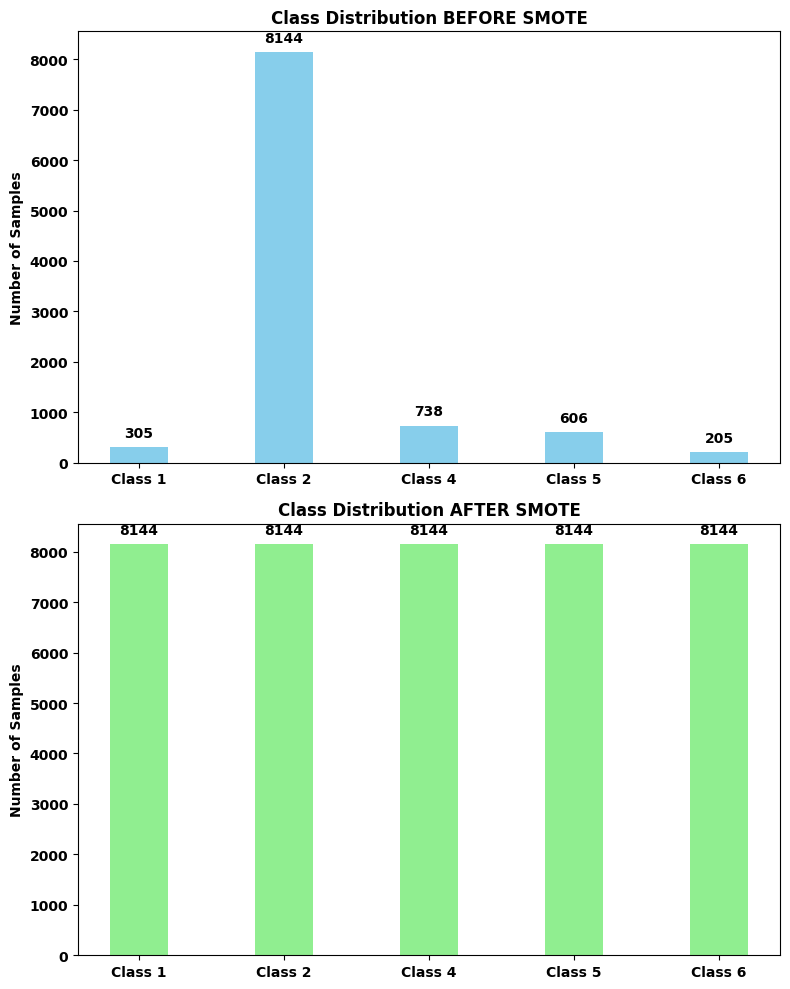

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_labels = ['Class 1', 'Class 2', 'Class 4', 'Class 5', 'Class 6']

# Values before and after SMOTE
before_counts = [305, 8144, 738, 606, 205]
after_counts = [8144, 8144, 8144, 8144, 8144]

x = np.arange(len(class_labels))  # label locations
width = 0.4  # width of bars

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))  # 2 rows, 1 column

# Plot BEFORE SMOTE
ax1.bar(x, before_counts, width, color='skyblue')
ax1.set_title('Class Distribution BEFORE SMOTE', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(class_labels, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontweight='bold')
ax1.tick_params(axis='y', labelsize=10)
plt.setp(ax1.get_yticklabels(), fontweight='bold')

# Add values on top
for i, count in enumerate(before_counts):
    ax1.text(i, count + 200, str(count), ha='center', fontweight='bold')

# Plot AFTER SMOTE
ax2.bar(x, after_counts, width, color='lightgreen')
ax2.set_title('Class Distribution AFTER SMOTE', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(class_labels, fontweight='bold')
ax2.set_ylabel('Number of Samples', fontweight='bold')
ax2.tick_params(axis='y', labelsize=10)
plt.setp(ax2.get_yticklabels(), fontweight='bold')

# Add values on top
for i, count in enumerate(after_counts):
    ax2.text(i, count + 200, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42,stratify=y_resampled)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32576, 768)
(32576,)
(8144, 768)
(8144,)


In [30]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


xgb = XGBClassifier(
    n_estimators=300, learning_rate=0.1, max_depth=8,
    subsample=0.8, colsample_bytree=0.8,
    eval_metric="mlogloss", use_label_encoder=False, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42
)

stacked_clf = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

stacked_clf.fit(X_train, y_train)

y_pred = stacked_clf.predict(X_test)

print("\nStacking Ensemble Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Stacking Ensemble Performance
Accuracy: 0.9894400785854617

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       0.98      0.97      0.97      1628
           2       0.98      0.99      0.99      1629
           3       0.99      0.99      0.99      1629
           4       1.00      1.00      1.00      1629

    accuracy                           0.99      8144
   macro avg       0.99      0.99      0.99      8144
weighted avg       0.99      0.99      0.99      8144


Confusion Matrix:
 [[1629    0    0    0    0]
 [   6 1574   25   20    3]
 [   1   21 1607    0    0]
 [   0    9    0 1619    1]
 [   0    0    0    0 1629]]


# Test Case Generation

In [31]:
import unittest

def generate_bug_test_stub(bug_id, bug_description, max_len=200):
    """
    Generate a unittest stub for a bug, print only.
    Truncate description for readability in output.
    """
    # Truncate long descriptions
    truncated_desc = (bug_description[:max_len] + '...') if len(bug_description) > max_len else bug_description
    
    code = f"""
import unittest

class Test_{bug_id.replace('-', '_')}(unittest.TestCase):
    \"\"\"Auto-generated unittest for bug: {bug_id}\"\"\"

    def test_bug(self):
        # Bug description: {truncated_desc}
        # TODO: Replace this with real test logic
        self.assertTrue(True, 'Placeholder for bug {bug_id}')

if __name__ == '__main__':
    unittest.main()
"""
    # Print only (no saving)
    print(f"\n--- Generated unittest for {bug_id} ---\n")
    print(code.strip())
    return code

# Loop through first N bugs in your DataFrame and generate stubs
N = min(10, len(df))  # adjust how many to display
for i in range(N):
    bug_id = df['bug_id'].iloc[i]
    bug_desc = df['combined_text'].iloc[i]
    generate_bug_test_stub(bug_id, bug_desc)



--- Generated unittest for BUGZILLA-294734 ---

import unittest

class Test_BUGZILLA_294734(unittest.TestCase):
    """Auto-generated unittest for bug: BUGZILLA-294734"""

    def test_bug(self):
        # Bug description: emergency release broken many users cant enter bugs particularly fresh install need pull post instead
        # TODO: Replace this with real test logic
        self.assertTrue(True, 'Placeholder for bug BUGZILLA-294734')

if __name__ == '__main__':
    unittest.main()

--- Generated unittest for OTHER_APPLICATIONS-363323 ---

import unittest

class Test_OTHER_APPLICATIONS_363323(unittest.TestCase):
    """Auto-generated unittest for bug: OTHER_APPLICATIONS-363323"""

    def test_bug(self):
        # Bug description: dom view really inefficient setting shown comment url current code menuitem command toggler setter pref observer setter pref proposed code menuitem command toggler pref observer setter arguably rebuil...
        # TODO: Replace this with real test logic

# Agentic AI for QA Planning

In [32]:
# Bug age and priority
df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
df['bug_age_days'] = (pd.to_datetime('today') - df['creation_date']).dt.days
df['priority_score'] = df['severity_label']*2 + df['bug_age_days'] / (df['bug_age_days'].max()+1)

class QATestAgent:
    def __init__(self, bugs_df):
        self.bugs_df = bugs_df

    def decide_testing_order(self):
        return self.bugs_df.sort_values(by=["priority_score","severity_label","bug_fix_time"],
                                        ascending=[False,False,True])
    
    def allocate_resources(self, testers):
        plan = []
        sorted_bugs = self.decide_testing_order().reset_index(drop=True)
        for i, bug in sorted_bugs.iterrows():
            assigned = testers[i % len(testers)]
            expected_fix_time = bug['bug_fix_time']*0.9 if 'bug_fix_time' in bug else None
            plan.append({
                "bug_id": bug["bug_id"],
                "priority_score": bug["priority_score"],
                "severity_label": bug["severity_label"],
                "assigned_tester": assigned,
                "expected_fix_time": expected_fix_time
            })
        return pd.DataFrame(plan)

agent = QATestAgent(df)
final_plan = agent.allocate_resources(testers=["Tester_A","Tester_B","Tester_C"])
print("Top Bugs Allocation:\n", final_plan.head(10))


Top Bugs Allocation:
                         bug_id  priority_score  severity_label  \
0                    NSPR-8018        8.957772               4   
1         CORE_GRAVEYARD-12077        8.950983               4   
2              DIRECTORY-12884        8.949686               4   
3                   CORE-13676        8.948388               4   
4         CORE_GRAVEYARD-17416        8.943995               4   
5  MOZILLA.ORG_GRAVEYARD-22373        8.938405               4   
6              SEAMONKEY-32180        8.929919               4   
7                   CORE-35687        8.927224               4   
8                   CORE-44857        8.918538               4   
9                   CORE-47791        8.915743               4   

  assigned_tester  expected_fix_time  
0        Tester_A                2.7  
1        Tester_B                0.9  
2        Tester_C                7.2  
3        Tester_A                3.6  
4        Tester_B                1.8  
5        Tester_C

# Automation Layer (RPA)

In [35]:
# Step 5: Automation Layer (RPA)
import pandas as pd

def auto_fill_bug_report(bug_df):
    for _, bug in bug_df.iterrows():
        print(f"Filling bug report for {bug['bug_id']} assigned to {bug['assigned_tester']}")
        # Here you would integrate with Bugzilla/Jira API

def trigger_tests(bug_df):
    for _, bug in bug_df.iterrows():
        print(f"Triggering test for {bug['bug_id']}")
        # Example: run unittest dynamically
        # os.system(f"python generated_tests/test_{bug['bug_id'].replace('-', '_')}.py")

def generate_dashboard(bug_df):
    summary = bug_df.groupby('assigned_tester')['expected_fix_time'].sum()
    print("\nQA Dashboard Summary:")
    print(summary)
    return summary

def bug_status_to_test_outcome(bug_df):
    bug_df['test_result'] = bug_df['expected_fix_time'].apply(lambda x: 'Pass' if x < 10 else 'Fail')
    print("\nBug -> Test Outcome mapping:")
    print(bug_df[['bug_id', 'test_result']])
    return bug_df

# Run Automation Layer
auto_fill_bug_report(final_plan)
trigger_tests(final_plan)
dashboard = generate_dashboard(final_plan)
final_results = bug_status_to_test_outcome(final_plan)


Filling bug report for NSPR-8018 assigned to Tester_A
Filling bug report for CORE_GRAVEYARD-12077 assigned to Tester_B
Filling bug report for DIRECTORY-12884 assigned to Tester_C
Filling bug report for CORE-13676 assigned to Tester_A
Filling bug report for CORE_GRAVEYARD-17416 assigned to Tester_B
Filling bug report for MOZILLA.ORG_GRAVEYARD-22373 assigned to Tester_C
Filling bug report for SEAMONKEY-32180 assigned to Tester_A
Filling bug report for CORE-35687 assigned to Tester_B
Filling bug report for CORE-44857 assigned to Tester_C
Filling bug report for CORE-47791 assigned to Tester_A
Filling bug report for BUGZILLA-54901 assigned to Tester_B
Filling bug report for CORE-67723 assigned to Tester_C
Filling bug report for NSPR-70116 assigned to Tester_A
Filling bug report for CORE_GRAVEYARD-75651 assigned to Tester_B
Filling bug report for CORE-88747 assigned to Tester_C
Filling bug report for MAILNEWS_CORE-90494 assigned to Tester_A
Filling bug report for BUGZILLA-95743 assigned to T

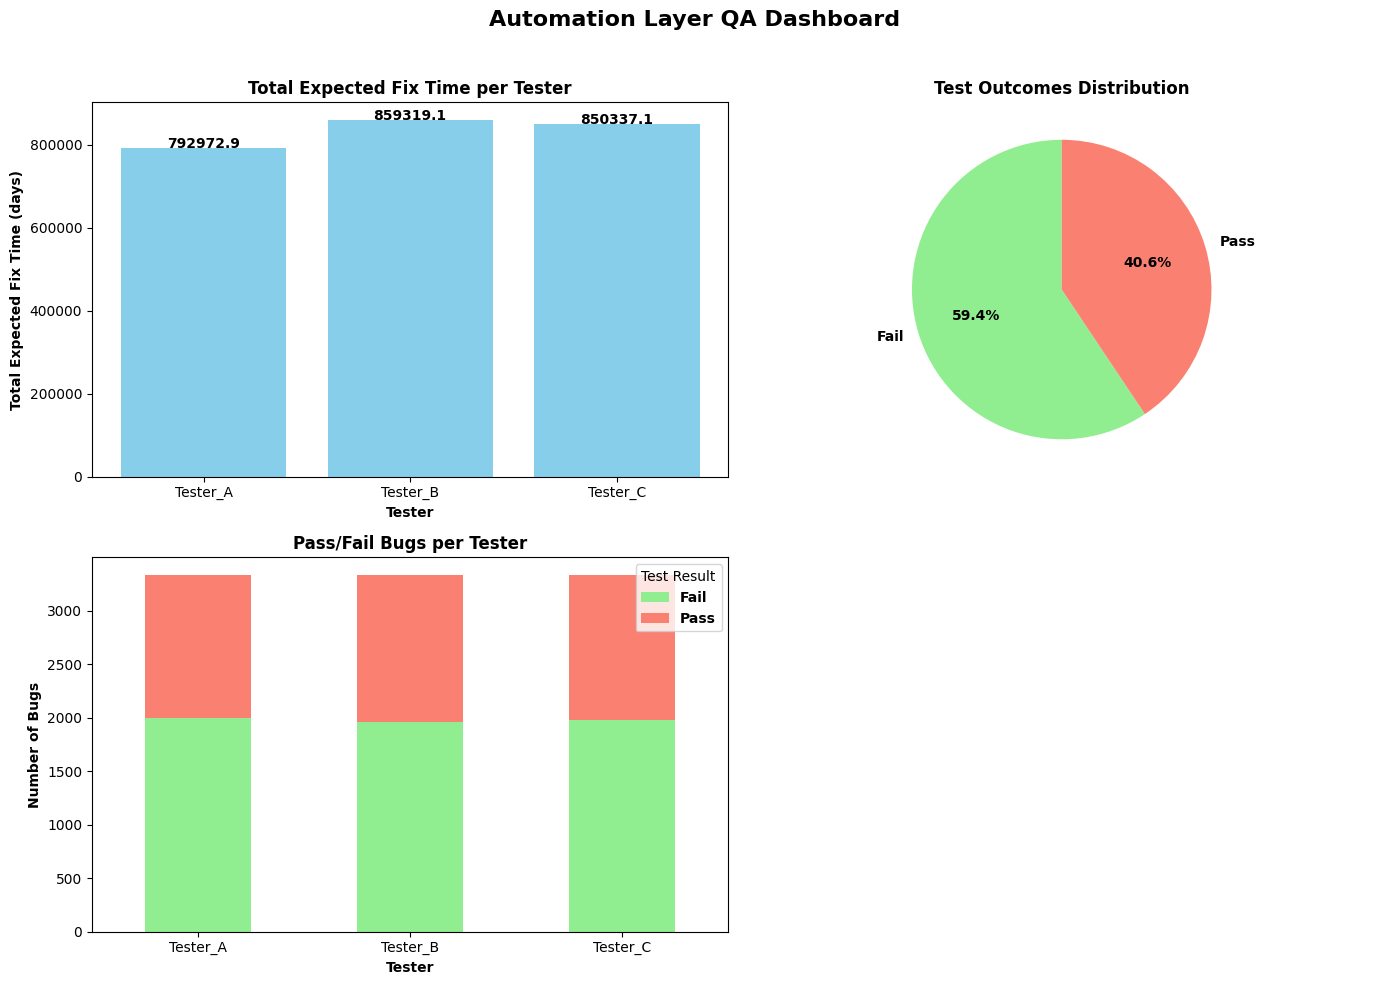

In [36]:
import matplotlib.pyplot as plt

# Prepare data
dashboard = final_plan.groupby('assigned_tester')['expected_fix_time'].sum()
test_outcomes = final_results['test_result'].value_counts()
tester_outcomes = final_results.groupby(['assigned_tester', 'test_result']).size().unstack(fill_value=0)

# Create figure with 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Automation Layer QA Dashboard', fontweight='bold', fontsize=16)

bars = axs[0, 0].bar(dashboard.index, dashboard.values, color='skyblue')
axs[0, 0].set_title('Total Expected Fix Time per Tester', fontweight='bold')
axs[0, 0].set_xlabel('Tester', fontweight='bold')
axs[0, 0].set_ylabel('Total Expected Fix Time (days)', fontweight='bold')
axs[0, 0].tick_params(axis='x', labelrotation=0)
axs[0, 0].tick_params(axis='both', labelsize=10)
for bar in bars:
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', fontweight='bold')

colors = ['lightgreen', 'salmon']
axs[0, 1].pie(test_outcomes, labels=test_outcomes.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'weight':'bold'})
axs[0, 1].set_title('Test Outcomes Distribution', fontweight='bold')

tester_outcomes.plot(kind='bar', stacked=True, color=['lightgreen','salmon'], ax=axs[1, 0])
axs[1, 0].set_title('Pass/Fail Bugs per Tester', fontweight='bold')
axs[1, 0].set_xlabel('Tester', fontweight='bold')
axs[1, 0].set_ylabel('Number of Bugs', fontweight='bold')
axs[1, 0].tick_params(axis='x', labelrotation=0)
axs[1, 0].tick_params(axis='both', labelsize=10)
axs[1, 0].legend(title='Test Result', prop={'weight':'bold'})

# Hide unused subplot (bottom-right)
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Evaluation

In [37]:
def evaluate_agent_effectiveness(before_df, after_df):
    before_mean = before_df["bug_fix_time"].mean() if "bug_fix_time" in before_df else None
    after_mean = after_df["expected_fix_time"].mean() if "expected_fix_time" in after_df else None
    improvement = (before_mean - after_mean) if before_mean is not None and after_mean is not None else None
    print("\n Agent Evaluation")
    print("Mean bug_fix_time BEFORE:", before_mean)
    print("Mean expected_fix_time AFTER :", after_mean)
    print("Reduction in mean bug_fix_time:", improvement)
    return {"before": before_mean, "after": after_mean, "improvement": improvement}

results = evaluate_agent_effectiveness(df, final_plan)
print("Returned Results:", results)



 Agent Evaluation
Mean bug_fix_time BEFORE: 278.125525105021
Mean expected_fix_time AFTER : 250.31297259451893
Reduction in mean bug_fix_time: 27.81255251050206
Returned Results: {'before': 278.125525105021, 'after': 250.31297259451893, 'improvement': 27.81255251050206}


Confusion Matrix:
 [[1629    0    0    0    0]
 [   6 1574   25   20    3]
 [   1   21 1607    0    0]
 [   0    9    0 1619    1]
 [   0    0    0    0 1629]]


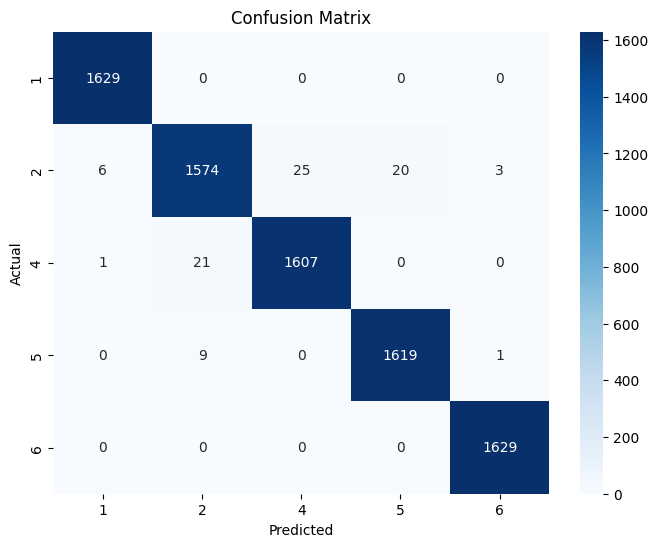

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a table
print("Confusion Matrix:\n", cm)

# Optional: Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# One-hot encode the true labels
y_test_bin = label_binarize(y_test, classes=le.transform(le.classes_))
n_classes = y_test_bin.shape[1]

y_score = stacked_clf.predict_proba(X_test)

plt.figure(figsize=(10,8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})', linewidth=2)

# Random chance diagonal line
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

# Set plot limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set axis labels and title with bold font
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curve', fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
# Add legend with bold labels
plt.legend(loc='lower right', fontsize=10, title='Classes', prop = {'weight': 'bold'})

# Show plot
plt.show()


NameError: name 'clf' is not defined

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_pred = stacked_clf.predict(X_test)

# Overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_class_metrics = pd.DataFrame(report_dict).transpose()

# Keep only actual classes
class_labels = [c for c in df_class_metrics.index if c not in ['accuracy', 'macro avg', 'weighted avg']]
df_class_metrics = df_class_metrics.loc[class_labels]

# Add overall accuracy column
df_class_metrics['accuracy'] = overall_accuracy

# Metrics to plot
metrics_to_plot = ['precision', 'recall', 'f1-score', 'accuracy']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(class_labels))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    ax.bar(x + i*width, df_class_metrics[metric], width, label=metric, color=colors[i], edgecolor='grey')

ax.set_xlabel('Classes', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Per-class Metrics', fontweight='bold')
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(class_labels, rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')
ax.set_ylim(0, 1.05)
ax.legend(prop={'weight': 'bold'})

plt.tight_layout()
plt.show()


NameError: name 'df_class_metrics' is not defined

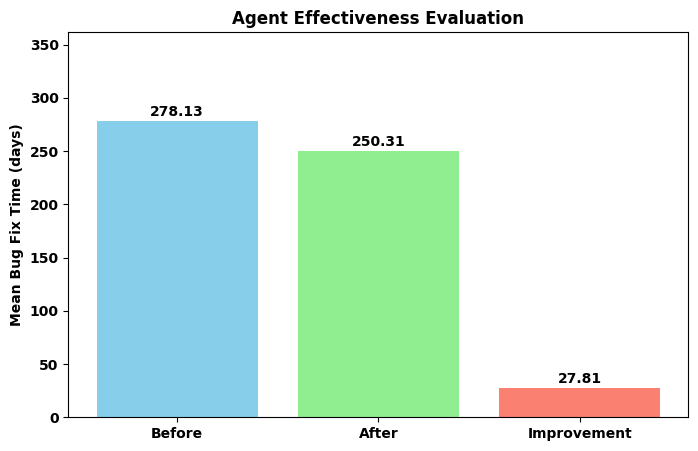

In [41]:
import matplotlib.pyplot as plt

# Values
labels = ['Before', 'After', 'Improvement']
values = [278.13, 250.31, 27.81]  # rounded for readability
colors = ['skyblue', 'lightgreen', 'salmon']

fig, ax = plt.subplots(figsize=(8,5))

# Plot bars
bars = ax.bar(labels, values, color=colors)

# Bold labels and ticks
ax.set_ylabel('Mean Bug Fix Time (days)', fontweight='bold')
ax.set_title('Agent Effectiveness Evaluation', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2, f'{height:.2f}', 
            ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(values)*1.3)  # add some space on top
plt.show()


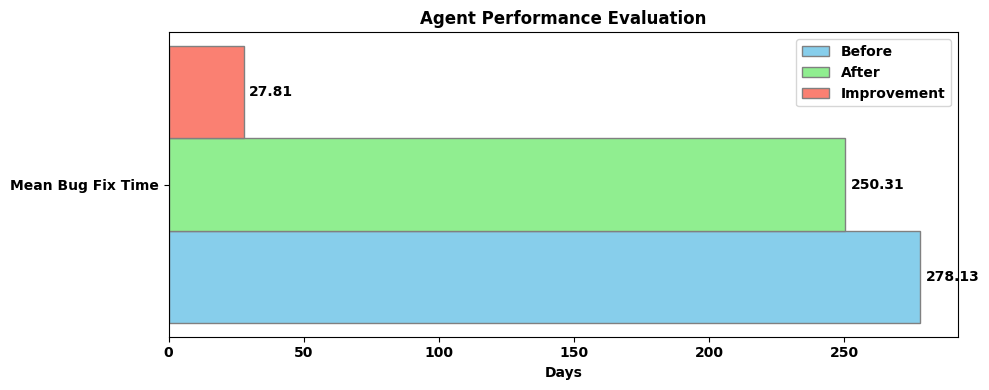

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Values
categories = ['Mean Bug Fix Time']
before = [278.13]
after = [250.31]
improvement = [27.81]

x = np.arange(len(categories))  # category locations
width = 0.25  # width of bars

fig, ax = plt.subplots(figsize=(10, 4))

# Horizontal bars
ax.barh(x - width, before, width, label='Before', color='skyblue', edgecolor = 'grey')
ax.barh(x, after, width, label='After', color='lightgreen', edgecolor = 'grey')
ax.barh(x + width, improvement, width, label='Improvement', color='salmon', edgecolor = 'grey')

# Labels and title
ax.set_xlabel('Days', fontweight='bold')
ax.set_title('Agent Performance Evaluation', fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(categories, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Add values on bars
for i, val in enumerate(before):
    ax.text(val + 2, x[i] - width, f'{val:.2f}', va='center', fontweight='bold')
for i, val in enumerate(after):
    ax.text(val + 2, x[i], f'{val:.2f}', va='center', fontweight='bold')
for i, val in enumerate(improvement):
    ax.text(val + 2, x[i] + width, f'{val:.2f}', va='center', fontweight='bold')

ax.legend(prop={'weight':'bold'})
plt.tight_layout()
plt.show()


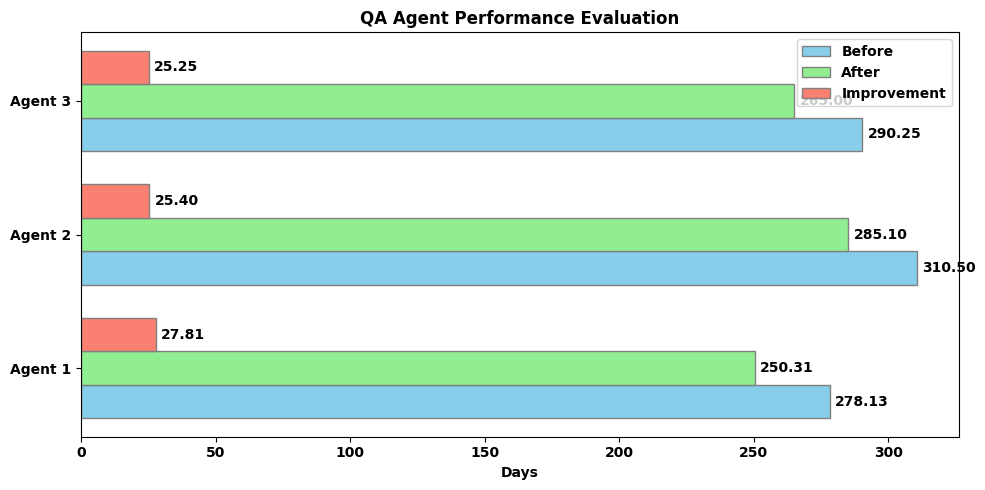

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for multiple agents
agents = ['Agent 1', 'Agent 2', 'Agent 3']
before = [278.13, 310.50, 290.25]
after = [250.31, 285.10, 265.00]
improvement = [27.81, 25.40, 25.25]

x = np.arange(len(agents))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 5))

# Horizontal bars for each metric
ax.barh(x - width, before, width, label='Before', color='skyblue', edgecolor = 'grey')
ax.barh(x, after, width, label='After', color='lightgreen', edgecolor = 'grey')
ax.barh(x + width, improvement, width, label='Improvement', color='salmon', edgecolor = 'grey')

# Labels and title
ax.set_xlabel('Days', fontweight='bold')
ax.set_title('QA Agent Performance Evaluation', fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(agents, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Add values on bars
for i in range(len(agents)):
    ax.text(before[i] + 2, x[i] - width, f'{before[i]:.2f}', va='center', fontweight='bold')
    ax.text(after[i] + 2, x[i], f'{after[i]:.2f}', va='center', fontweight='bold')
    ax.text(improvement[i] + 2, x[i] + width, f'{improvement[i]:.2f}', va='center', fontweight='bold')

ax.legend(prop={'weight':'bold'})
plt.tight_layout()
plt.show()


# Comparision

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,         # expand until all leaves are pure or contain min_samples_split samples
    min_samples_split=2,    # minimum samples to split a node
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("\nRandom Forest Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Classifier Performance
Accuracy: 0.9823182711198428

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1629
           1       0.97      0.94      0.96      1628
           2       0.97      0.98      0.98      1629
           3       0.98      0.99      0.98      1629
           4       1.00      1.00      1.00      1629

    accuracy                           0.98      8144
   macro avg       0.98      0.98      0.98      8144
weighted avg       0.98      0.98      0.98      8144


Confusion Matrix:
 [[1628    1    0    0    0]
 [  13 1530   50   33    2]
 [   0   27 1600    2    0]
 [   0   14    0 1614    1]
 [   0    1    0    0 1628]]


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree
dt_clf = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy'
    max_depth=None,          # grow until leaves are pure
    min_samples_split=2,     # minimum samples to split a node
    random_state=42
)

# Train the classifier
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluation
print("\nDecision Tree Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



Decision Tree Classifier Performance
Accuracy: 0.8058693516699411

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1629
           1       0.67      0.53      0.59      1628
           2       0.76      0.80      0.78      1629
           3       0.81      0.86      0.83      1629
           4       0.90      0.93      0.91      1629

    accuracy                           0.81      8144
   macro avg       0.80      0.81      0.80      8144
weighted avg       0.80      0.81      0.80      8144


Confusion Matrix:
 [[1493   76   32   18   10]
 [ 185  858  277  205  103]
 [  46  167 1302   79   35]
 [  21  128   60 1400   20]
 [   9   52   35   23 1510]]


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
lr_clf = LogisticRegression(
    solver='lbfgs',      # good for multi-class problems
    max_iter=1000,       # increase iterations if not converging
    multi_class='auto',
    random_state=42
)

# Train the classifier
lr_clf.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_clf.predict(X_test)

# Evaluation
print("\nLogistic Regression Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



Logistic Regression Classifier Performance
Accuracy: 0.793713163064833

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1629
           1       0.65      0.49      0.56      1628
           2       0.73      0.75      0.74      1629
           3       0.84      0.83      0.84      1629
           4       0.86      0.96      0.91      1629

    accuracy                           0.79      8144
   macro avg       0.78      0.79      0.79      8144
weighted avg       0.78      0.79      0.79      8144


Confusion Matrix:
 [[1529   65   15    7   13]
 [ 221  804  298  164  141]
 [  61  216 1216   71   65]
 [  14  124   98 1350   43]
 [   0   24   29   11 1565]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM classifier
svm_clf = SVC(
    kernel='rbf',         # radial basis function kernel
    C=1.0,                # regularization parameter
    gamma='scale',        # kernel coefficient
    random_state=42
)

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluation
print("\nSVM Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


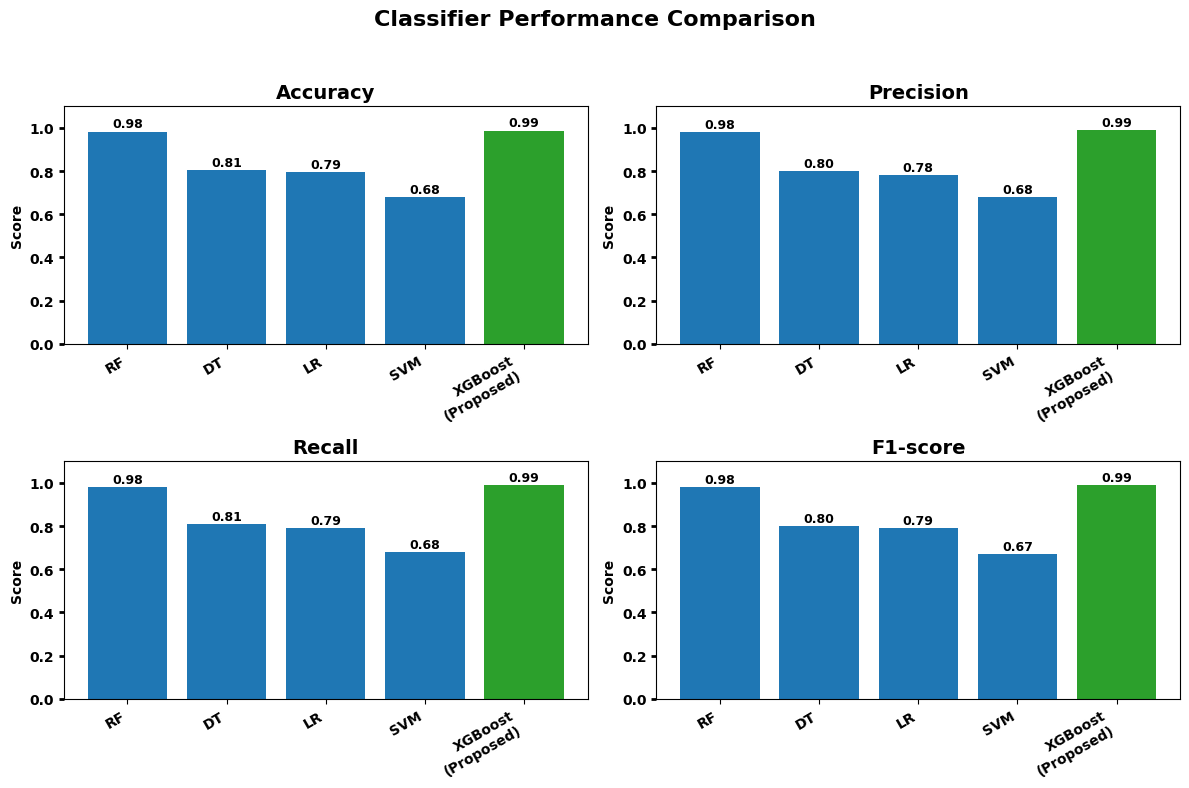

In [9]:
import matplotlib.pyplot as plt

# Classifier names
models = ["RF", "DT", "LR", "SVM", "XGBoost\n(Proposed)"]

# Accuracy values
accuracy = [0.9823, 0.8059, 0.7937, 0.6780, 0.9876]

# Precision (weighted avg from reports)
precision = [0.98, 0.80, 0.78, 0.68, 0.99]

# Recall (weighted avg from reports)
recall = [0.98, 0.81, 0.79, 0.68, 0.99]

# F1-score (weighted avg from reports)
f1_score = [0.98, 0.80, 0.79, 0.67, 0.99]

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1_score
}

# Plot separate graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, (metric_name, values) in enumerate(metrics.items()):
    bars = axes[i].bar(models, values, color=['tab:blue']*4 + ['tab:green'])
    
    # Title bold
    axes[i].set_title(metric_name, fontweight="bold", fontsize=14)
    axes[i].set_ylim(0, 1.1)
    
    # X-axis tick labels bold
    axes[i].set_xticklabels(models, rotation=30, ha="right", fontweight="bold", fontsize=10)
    
    # Y-axis label bold
    axes[i].set_ylabel("Score", fontweight="bold")
    
    # Bold axis ticks
    axes[i].tick_params(axis='y', labelsize=10, width=2)
    for label in axes[i].get_yticklabels():
        label.set_fontweight("bold")
    
    # Annotate values in bold
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.02, 
            f"{height:.2f}", 
            ha='center', 
            fontsize=9, 
            fontweight="bold"
        )

# Bold super title
plt.suptitle("Classifier Performance Comparison", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
